# Support Vector Machine

- Develop a model using the SVM Algorithm on a dataset


In [324]:
#import neccessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data in

In [110]:
#import weather dataset
df = pd.read_csv("water_potability.csv")
#take a look at the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Exploration

In [111]:
#statistical info about the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [112]:
#sumarry of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [113]:
#check for null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [115]:
#checking for significance of missing cells 
df['Sulfate'].isna().sum()/(len(df))*100

23.84004884004884

In [122]:
#replace missing cells with mean
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [149]:
df.groupby('Potability').count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1998,1998,1998,1998,1998,1998,1998,1998,1998
1,1278,1278,1278,1278,1278,1278,1278,1278,1278


<Figure size 864x432 with 0 Axes>

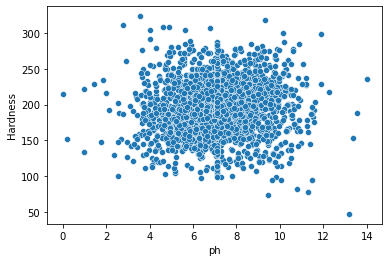

<Figure size 864x432 with 0 Axes>

In [134]:
#scatterplot to establish relationship between ph and hardness
sns.scatterplot(data=df, y ="Hardness", x="ph")
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

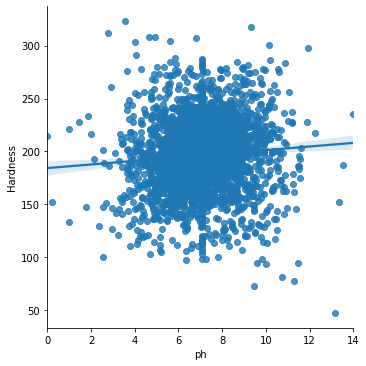

<Figure size 864x432 with 0 Axes>

In [133]:
sns.lmplot(data=df, y ="Hardness", x="ph")
plt.figure(figsize=(12,6))

According to the scatterplot, there is a positive correlation between the hardness of water and the pH scale, indicating that as the pH level of water increases, its hardness also increases. Water with a lower pH is considered more acidic, while water with a higher pH is considered more alkaline or basic. Alkaline water has the ability to neutralize acids, which may contribute to its increased hardness.

<Figure size 720x432 with 0 Axes>

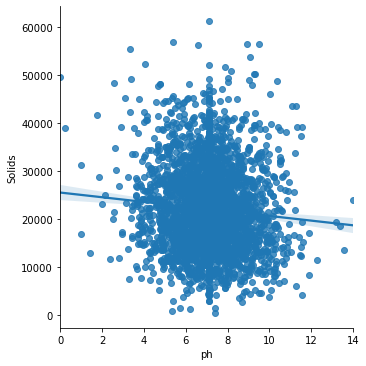

<Figure size 720x432 with 0 Axes>

In [142]:
#scatterplot to establish relationship between ph,solids and conductivity
sns.lmplot(data=df, x ="ph", y="Solids")
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

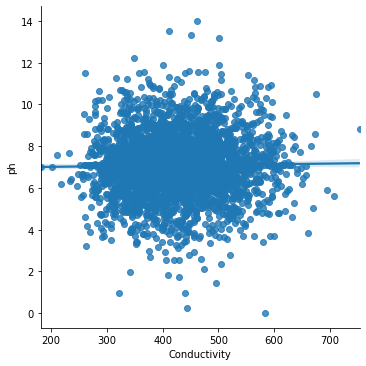

<Figure size 720x432 with 0 Axes>

In [146]:
sns.lmplot(data=df, y ="ph", x="Conductivity")
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

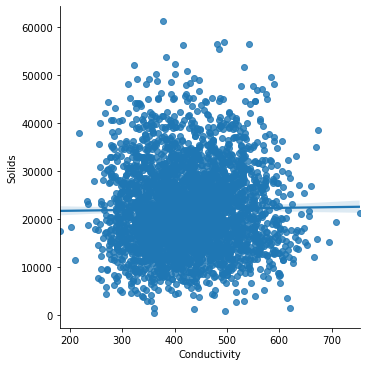

<Figure size 720x432 with 0 Axes>

In [145]:
sns.lmplot(data=df, x ="Conductivity", y="Solids")
plt.figure(figsize=(10,6))

According to the information available, there is a positive correlation between solids and conductivity, meaning that as the level of solids in water increases, so does its conductivity. In addition, solids have been shown to have a negative effect on pH levels, causing them to decrease and become more acidic as the level of solids increases. This suggests that there is a relationship between the level of solids in water, its conductivity, and its pH. Specifically, higher levels of solids lead to higher conductivity and lower pH, indicating a shift towards acidity.

<Figure size 864x432 with 0 Axes>

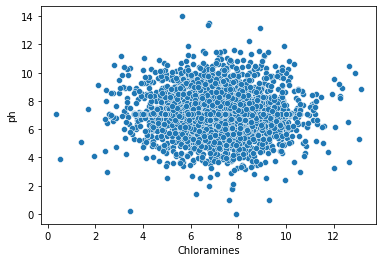

<Figure size 864x432 with 0 Axes>

In [135]:
sns.scatterplot(data=df, y ="ph", x="Chloramines")
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

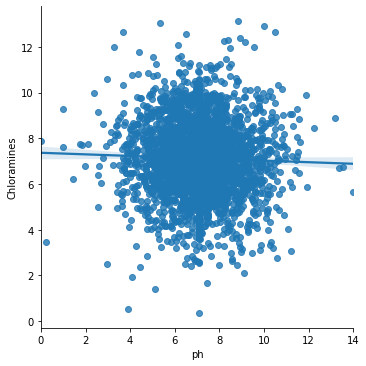

<Figure size 864x432 with 0 Axes>

In [137]:
sns.lmplot(data=df,x ="ph", y="Chloramines")
plt.figure(figsize=(12,6))

According to the scatterplot, there appears to be a relationship between the pH level of water and the effectiveness of chloramines as a disinfectant. Specifically, at higher pH levels, the effectiveness of chloramines in water appears to decrease.
It is worth noting that the relationship between pH and chloramine effectiveness can be complex and may depend on a range of factors, including the specific type and concentration of chloramines used, the pH level of the water, and the presence of other compounds or contaminants in the water. Therefore, careful monitoring and control of pH levels, as well as the use of appropriate dosing strategies, are important to ensure optimal disinfection performance and maintain safe water quality.



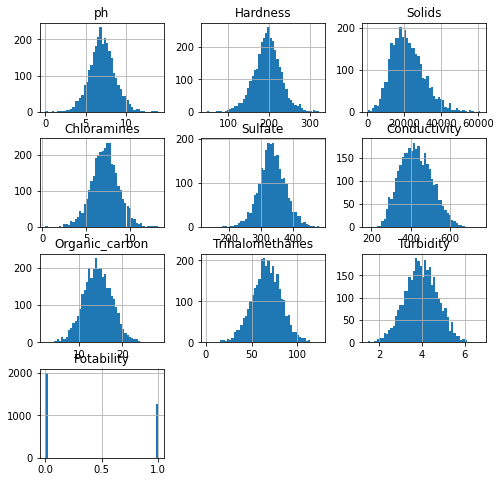

In [118]:
df.hist(bins=50,figsize=(8,8))
plt.show()

Let's select some features to train our model

In [273]:
x = df.drop(['Potability'],axis=1)
y =df['Potability'].values
x=x.values

## Using Scikit-learn

In [287]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [288]:
#import the SVC model
from sklearn.svm import SVC

In [289]:
model = SVC(kernel='linear',C=1)

In [290]:
#train the linear SVC Classifier with training data
model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [291]:
pred = model.predict(X_test)
print(pred[:11])
print("\n")
print(y_test[:11])

[0 0 0 1 0 0 0 0 0 0 0]


[0 1 0 0 1 1 0 0 0 0 0]


In [292]:
#check accuracy
model.score(X_test,y_test)

0.6189024390243902

## Using Tensorflow

In [293]:
#import tensorflow
import tensorflow as tf

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [317]:
models = Sequential()
#input layer
models.add(Dense(128,activation="relu"))
#hidden layer
models.add(Dense(64,activation="relu"))
models.add(Dense(32,activation="relu"))
#output layer
models.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation = "linear"))


In [323]:
models.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 128)               1280      
                                                                 
 dense_90 (Dense)            (None, 64)                8256      
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dense_92 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [320]:
#compile the model
models.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [321]:
#train the model
models.fit(X_train, y_train, epochs = 200,verbose=1)

Epoch 1/200
82/82 [==============================] - 1s 1ms/step - loss: 0.8079 - accuracy: 0.6061
Epoch 2/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.6065
Epoch 3/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.6065
Epoch 4/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.6065
Epoch 5/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7889 - accuracy: 0.6065
Epoch 6/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 7/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 8/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 9/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 10/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 11/

Epoch 83/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.6065
Epoch 84/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.6065
Epoch 85/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 86/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 87/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7887 - accuracy: 0.6065
Epoch 88/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 89/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoch 90/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.6065
Epoch 91/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.6065
Epoch 92/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065


82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 165/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 166/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.6065
Epoch 167/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.6065
Epoch 168/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 169/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.6065
Epoch 170/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.6065
Epoch 171/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6065
Epoch 172/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.6065
Epoch 173/200
82/82 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6065
Epoc